In [0]:
Стационарность рядов

In [2]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import warnings
from itertools import product

from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
PJME = pd.read_csv('my_PJME_MW.csv')
# Возьмём ресемплинг по дням, неделям и месяцам
PJME_day = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('D').mean()
PJME_week = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('W').mean()
PJME_month = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('M').mean()

In [8]:
PJME.head()

,Date,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
0,2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
1,2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2,2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
3,2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
4,2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


Date - дата
Time - время
PJME_MW - расход электроэнергии
month - номер месяца
dayofmonth - день месяца
quarter - четверть
dayofyear - день года
weekofyear - неделя года
dayofwee - день недели
hour - час
is_holiday - праздник
is_prev_holiday - предыдущий день выходной
is_next_holiday - следующий день выходной

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Figure size 1080x504 with 0 Axes>

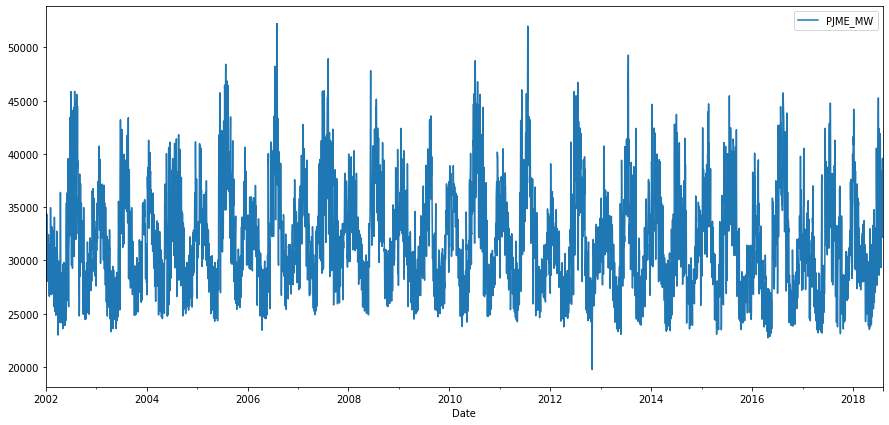

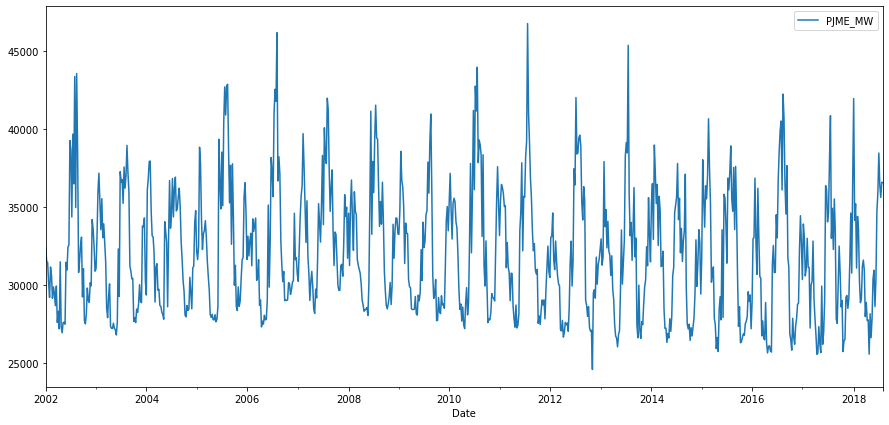

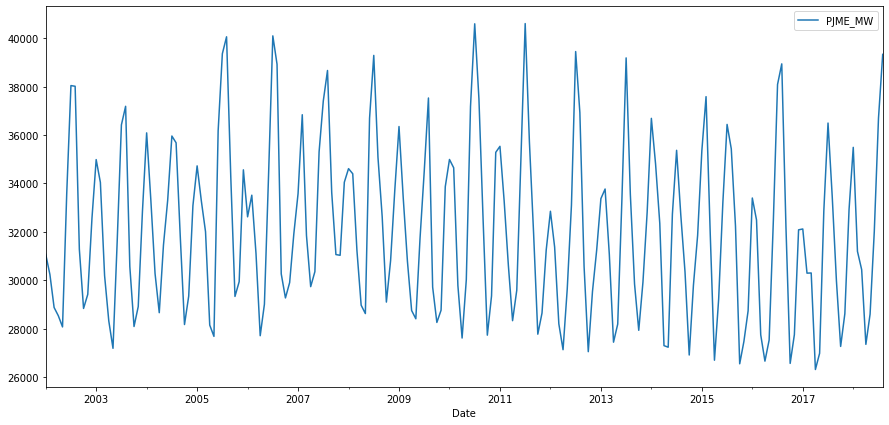

In [0]:
%pylab inline
plt.figure(figsize(15,7))
PJME_day.plot()
PJME_week.plot()
PJME_month.plot()

In [0]:
При сравнение этих графиков, видно, что по дням слишком перегружен как для зрительного анализа, так и для статистического.
В графиках явно отсутствуют тренды, наблюдается гомоскедастичность (разброс дисперсии не сильный), сезонность также отсутствует.
Исходя из чего можно предположить, что ряд является стационарным. Убедимся в этом с помощью теста Дики-Фуллера.

In [0]:
# Посчитаем критейри Дики-Фуллера для разных ресемплов (Дни, недели и месяца)
print(" Критерий Дики-Фуллера для дня: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW)[1])
print(" Критерий Дики-Фуллера для недели: p=%f" % sm.tsa.stattools.adfuller(PJME_week.PJME_MW)[1])
print(" Критерий Дики-Фуллера для месяца: p=%f" % sm.tsa.stattools.adfuller(PJME_month.PJME_MW)[1])

 Критерий Дики-Фуллера для дня: p=0.000000
 Критерий Дики-Фуллера для недели: p=0.000000
 Критерий Дики-Фуллера для месяца: p=0.307570


In [0]:
"Для дней: {}, Для недель: {}, Для месяцев: {}".format(len(PJME_day), len(PJME_week), len(PJME_month))

'Для дней: 6059, Для недель: 866, Для месяцев: 200'

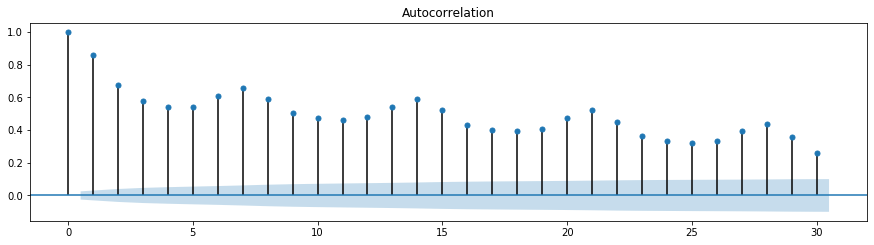

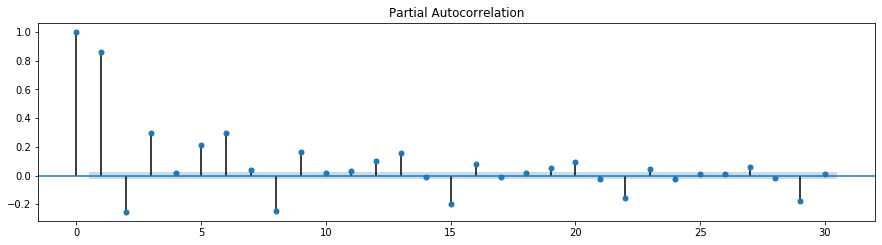

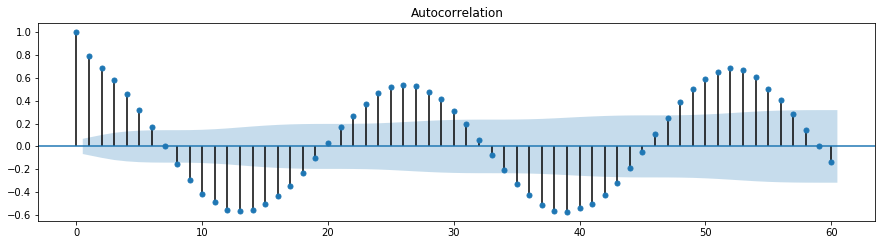

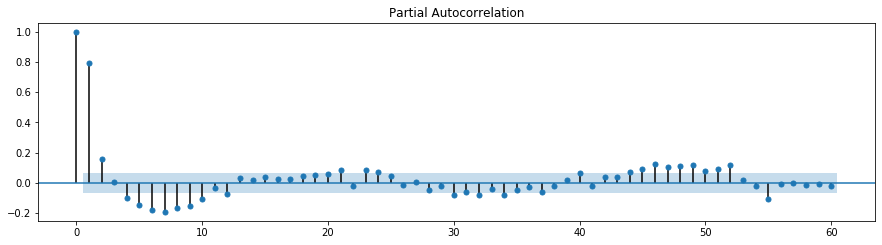

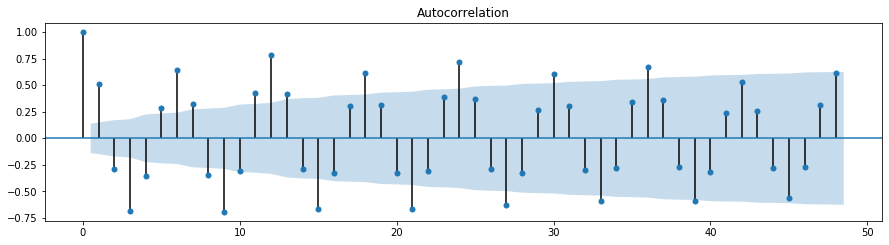

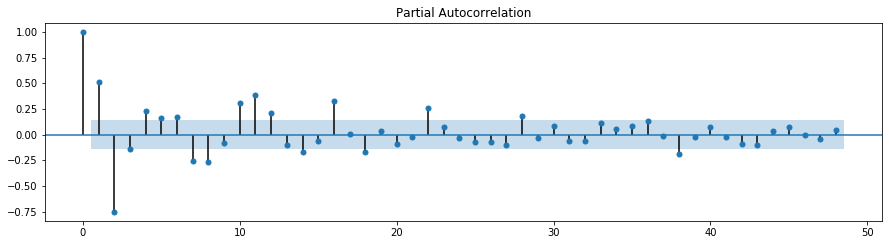

In [0]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_day.PJME_MW.values.squeeze(), lags=30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_day.PJME_MW.values.squeeze(), lags=30, ax=ax)
pylab.show()

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_week.PJME_MW.values.squeeze(), lags=2 * 30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_week.PJME_MW.values.squeeze(), lags=2 * 30, ax=ax)
pylab.show()

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_month.PJME_MW.values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_month.PJME_MW.values.squeeze(), lags=48, ax=ax)
pylab.show()

Оптимальный параметр преобразования Кокса- Бокса: -0.929646
 Критерий Дики-Фуллера: p=0.000000


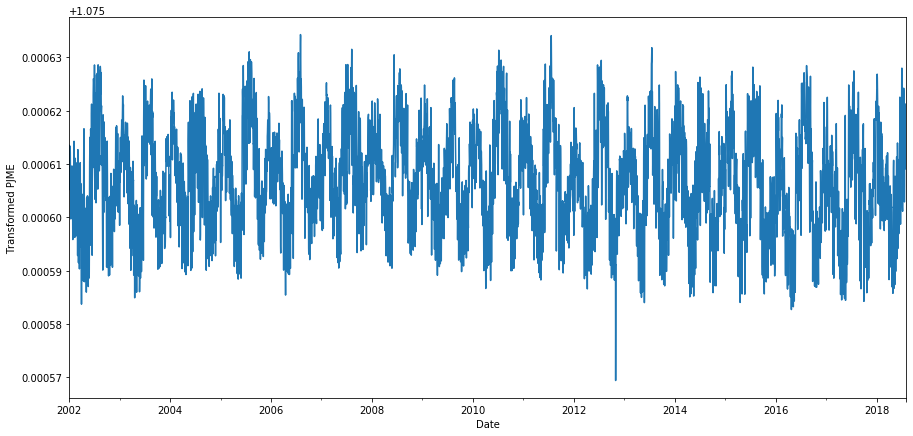

In [0]:
PJME_day['PJME_MW_BOX'], lmbda = stats.boxcox(PJME_day.PJME_MW)
plt.figure(figsize(15,7))
PJME_day.PJME_MW_BOX.plot()
plt.ylabel(u'Transformed PJME')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW_BOX)[1])

Оптимальный параметр преобразования Кокса- Бокса: -1.504300
 Критерий Дики-Фуллера: p=0.000001


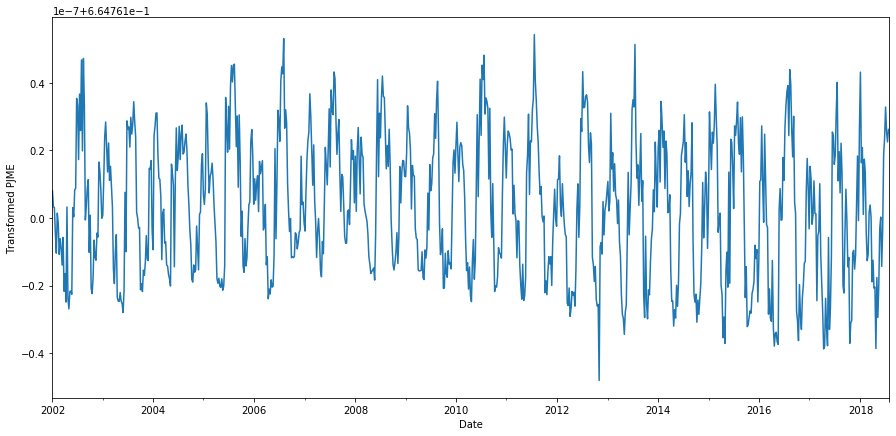

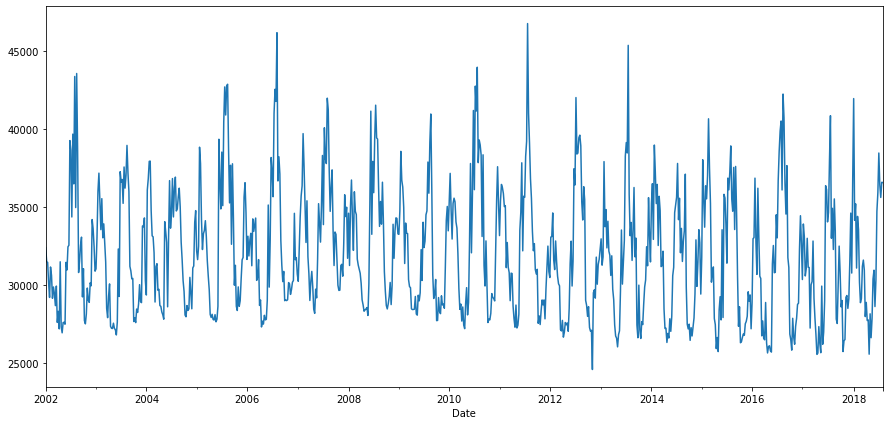

In [0]:
PJME_week['PJME_MW_BOX'], lmbda = stats.boxcox(PJME_week.PJME_MW)
plt.figure(figsize(15,7))
PJME_week.PJME_MW_BOX.plot()
plt.ylabel(u'Transformed PJME')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_week.PJME_MW_BOX)[1])
plt.figure(figsize(15,7))
PJME_week.PJME_MW.plot()

Оптимальный параметр преобразования Кокса- Бокса: -1.180792
 Критерий Дики-Фуллера: p=0.345407


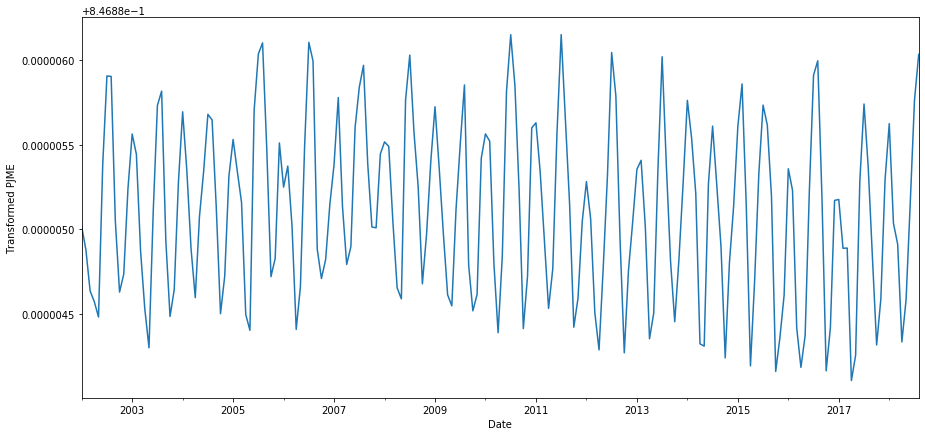

In [0]:
PJME_month['PJME_MW_BOX'], lmbda = stats.boxcox(PJME_month.PJME_MW)
plt.figure(figsize(15,7))
PJME_month.PJME_MW_BOX.plot()
plt.ylabel(u'Transformed PJME')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_month.PJME_MW_BOX)[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

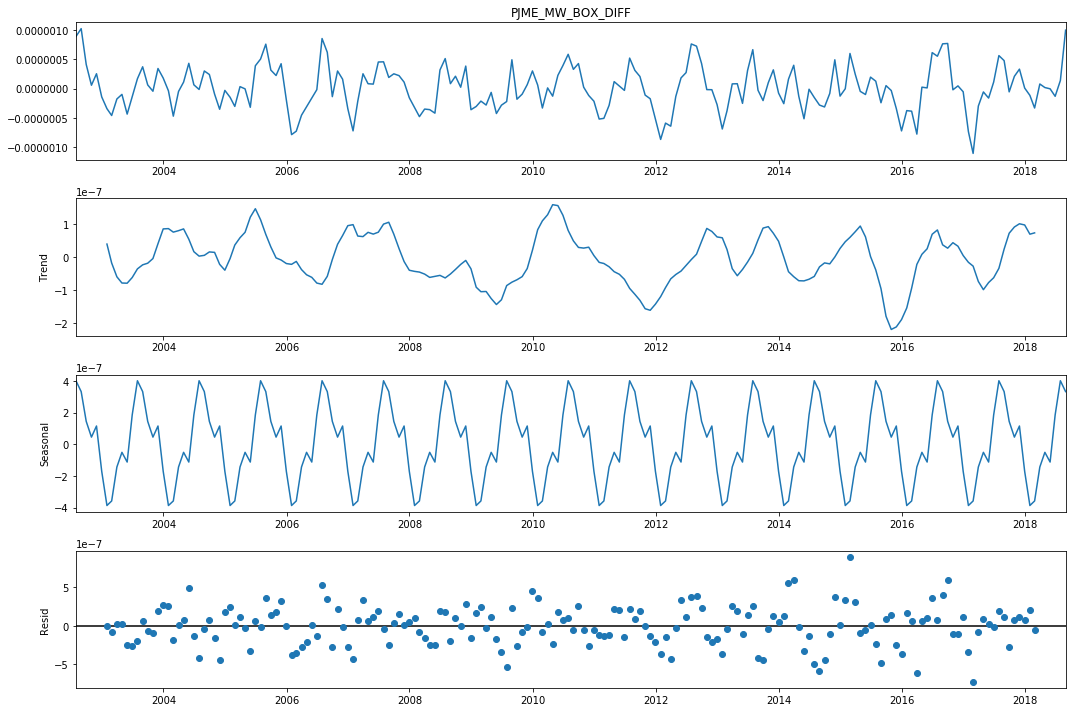

In [0]:
PJME_month['PJME_MW_BOX_DIFF'] = PJME_month.PJME_MW_BOX - PJME_month.PJME_MW_BOX.shift(6)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(PJME_month.PJME_MW_BOX_DIFF[6:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_month.PJME_MW_BOX_DIFF[6:])[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

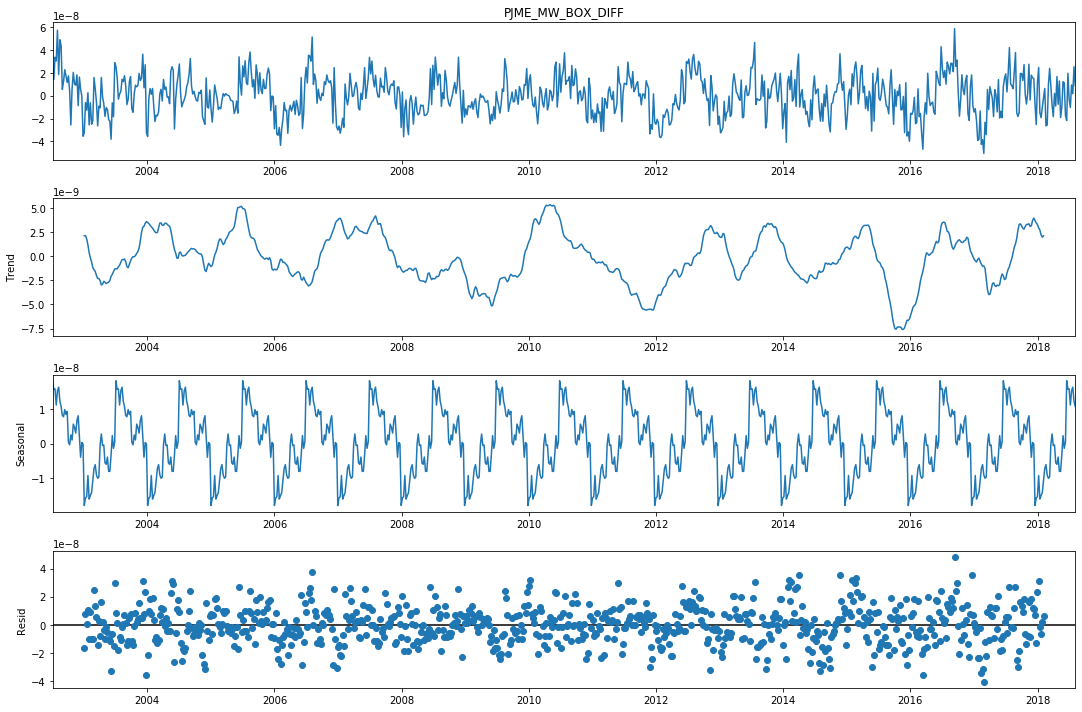

In [0]:
PJME_week['PJME_MW_BOX_DIFF'] = PJME_week.PJME_MW_BOX - PJME_week.PJME_MW_BOX.shift(26)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(PJME_week.PJME_MW_BOX_DIFF[26:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_week.PJME_MW_BOX_DIFF[26:])[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

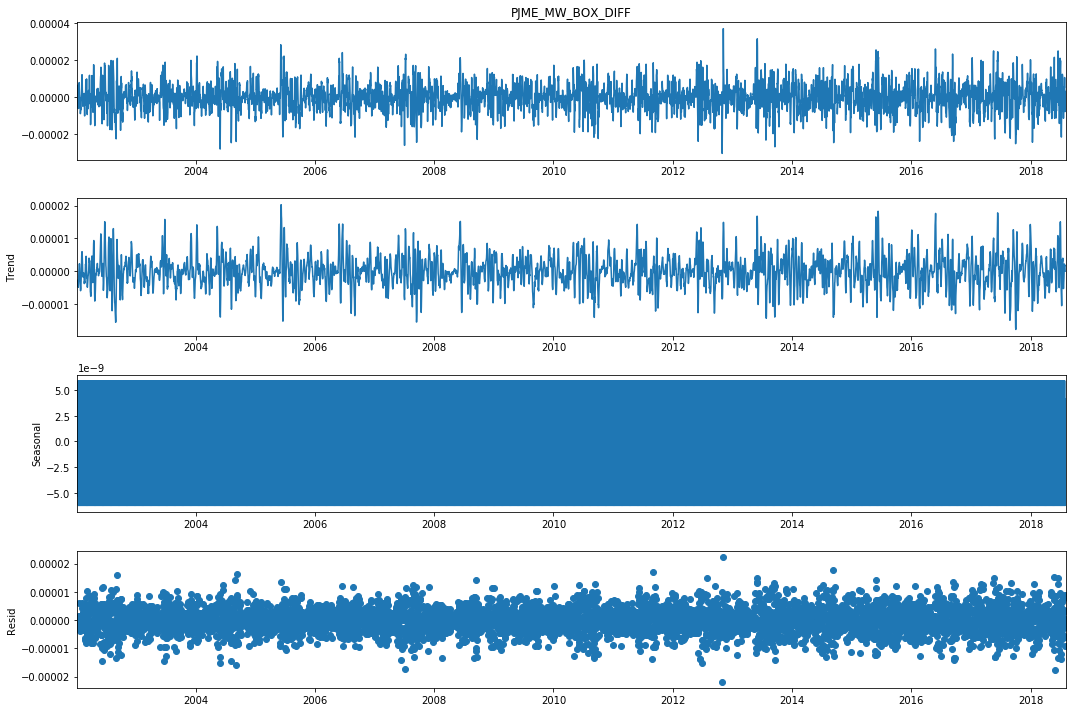

In [0]:
PJME_day['PJME_MW_BOX_DIFF'] = PJME_day.PJME_MW_BOX - PJME_day.PJME_MW_BOX.shift(7)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(PJME_day.PJME_MW_BOX_DIFF[7:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW_BOX_DIFF[7:])[1])

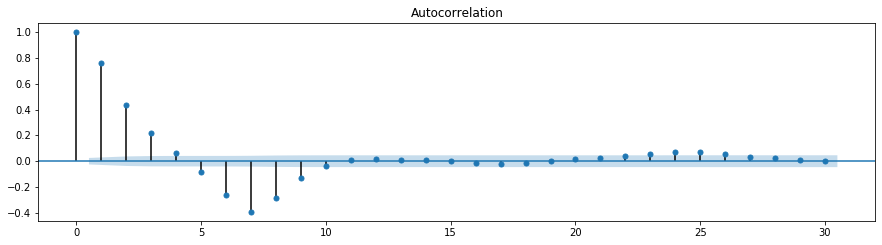

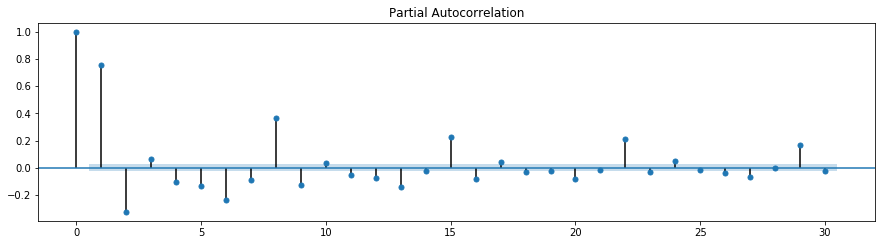

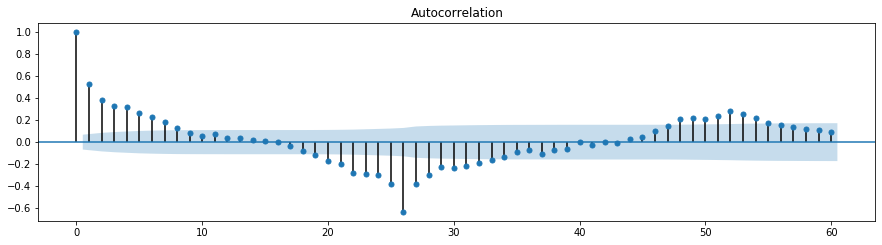

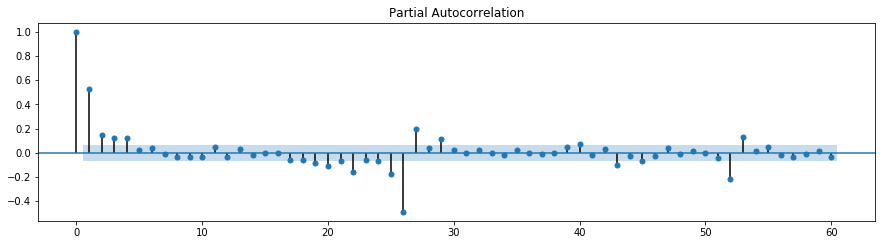

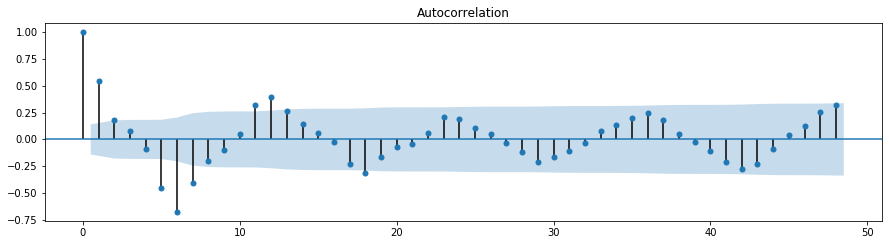

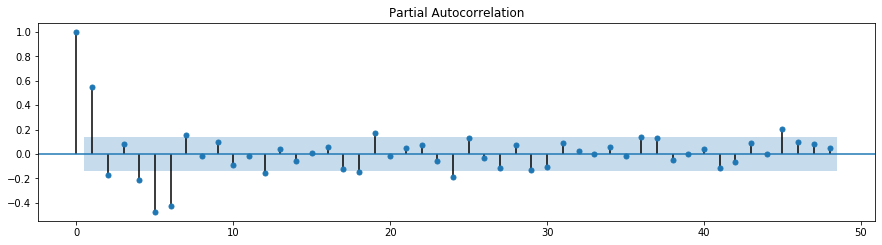

In [0]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_day.PJME_MW_BOX_DIFF.values[7:].squeeze(), lags=30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_day.PJME_MW_BOX_DIFF.values[7:].squeeze(), lags=30, ax=ax)
pylab.show()

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_week.PJME_MW_BOX_DIFF[26:].values.squeeze(), lags=2 * 30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_week.PJME_MW_BOX_DIFF[26:].values.squeeze(), lags=2 * 30, ax=ax)
pylab.show()

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_month.PJME_MW_BOX_DIFF[6:].values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_month.PJME_MW_BOX_DIFF[6:].values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()

In [0]:
month
p = 3
d = 0
q = 11
P = 4
D = 1
Q = 2


In [0]:
ps = range(0, 4)
d=0
qs = range(0, 12)
Ps = range(0, 5)
D=1
Qs = range(0, 2)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)
parameters_list

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 0, 3, 0),
 (0, 0, 3, 1),
 (0, 0, 4, 0),
 (0, 0, 4, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (0, 1, 2, 0),
 (0, 1, 2, 1),
 (0, 1, 3, 0),
 (0, 1, 3, 1),
 (0, 1, 4, 0),
 (0, 1, 4, 1),
 (0, 2, 0, 0),
 (0, 2, 0, 1),
 (0, 2, 1, 0),
 (0, 2, 1, 1),
 (0, 2, 2, 0),
 (0, 2, 2, 1),
 (0, 2, 3, 0),
 (0, 2, 3, 1),
 (0, 2, 4, 0),
 (0, 2, 4, 1),
 (0, 3, 0, 0),
 (0, 3, 0, 1),
 (0, 3, 1, 0),
 (0, 3, 1, 1),
 (0, 3, 2, 0),
 (0, 3, 2, 1),
 (0, 3, 3, 0),
 (0, 3, 3, 1),
 (0, 3, 4, 0),
 (0, 3, 4, 1),
 (0, 4, 0, 0),
 (0, 4, 0, 1),
 (0, 4, 1, 0),
 (0, 4, 1, 1),
 (0, 4, 2, 0),
 (0, 4, 2, 1),
 (0, 4, 3, 0),
 (0, 4, 3, 1),
 (0, 4, 4, 0),
 (0, 4, 4, 1),
 (0, 5, 0, 0),
 (0, 5, 0, 1),
 (0, 5, 1, 0),
 (0, 5, 1, 1),
 (0, 5, 2, 0),
 (0, 5, 2, 1),
 (0, 5, 3, 0),
 (0, 5, 3, 1),
 (0, 5, 4, 0),
 (0, 5, 4, 1),
 (0, 6, 0, 0),
 (0, 6, 0, 1),
 (0, 6, 1, 0),
 (0, 6, 1, 1),
 (0, 6, 2, 0),
 (0, 6, 2, 1),
 (0, 6, 3,

In [0]:
def get_best_model(y, parameters_list, d, D, lag, exog):
    results = []
    best_aic = float("inf")
    best_model = None
    best_param = ()

    for param in tqdm(parameters_list):
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:
            model=sm.tsa.statespace.SARIMAX(y, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], lag),
                                            exog=exog).fit()
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except Exception:
            continue
        aic = model.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    warnings.filterwarnings('default')

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    print(result_table.sort_values(by = 'aic', ascending=True).head())
    return best_model

In [0]:
%%time
from tqdm import tqdm
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(PJME_month.PJME_MW_BOX, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 6)).fit()
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except Exception:
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  0%|                                                  | 0/480 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 12%|█████▏                                   | 60/480 [00:46<11:18,  1.62s/it]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 29%|███████████▋                            | 140/480 [01:42<09:21,  1.65s/it]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
100%|████████████████████████████████████████| 480/480 [06:23<00:00,  1

      parameters          aic
52  (3, 3, 2, 0) -4119.095431
53  (3, 3, 2, 1) -4118.079250
54  (3, 3, 3, 1) -4101.051826
57  (3, 4, 3, 1) -4094.638571
15  (0, 5, 1, 1) -4023.510343
Wall time: 6min 23s


In [0]:
PJME_month.head(15)

mod = sm.tsa.statespace.SARIMAX(PJME_month.PJME_MW_BOX, 
                                order = (3, 0, 3), seasonal_order=(2, 1, 0, 6)
                                )

In [0]:
model = mod.fit()
model.aic

-4119.095430567912

In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        PJME_MW_BOX   No. Observations:                  200
Model:             SARIMAX(3, 0, 3)x(2, 1, [], 6)   Log Likelihood                2068.548
Date:                            Wed, 08 Apr 2020   AIC                          -4119.095
Time:                                    02:23:05   BIC                          -4089.685
Sample:                                01-31-2002   HQIC                         -4107.186
                                     - 08-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1857   1.17e-19   1.01e+19      0.000       1.186       1.186
ar.L2         -0.7826   8.47e-20  -9.24e+18      0.000      -0.783      -0.783
ar.L3          0.2134   6.38e-20   3.35e+18      0.000       0.213       0.213
ma.L1         -0.7956   1.11e-19  -7.19e+18      0.000      -0.796      -0.796
ma.L2          0.3998   1.03e-19    3.9e+18      0.000       0.400       0.400
ma.L3          0.2104   9.19e-20   2.29e+18      0.000       0.210       0.210
ar.S.L6       -0.8650   3.12e-20  -2.77e+19      0.000      -0.865      -0.865
ar.S.L12      -0.1890   4.64e-20  -4.08e+18      0.000      -0.189      -0.189
sigma2          1e-10   1.41e-10      0.711      0.477   -1.76e-10    3.76e-10
===================================================================================
Ljung-Box (Q):                       88.20   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.00   Prob(JB):                         0.71
Heteroskedasticity (H):               0.78   Skew:                             0.03
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

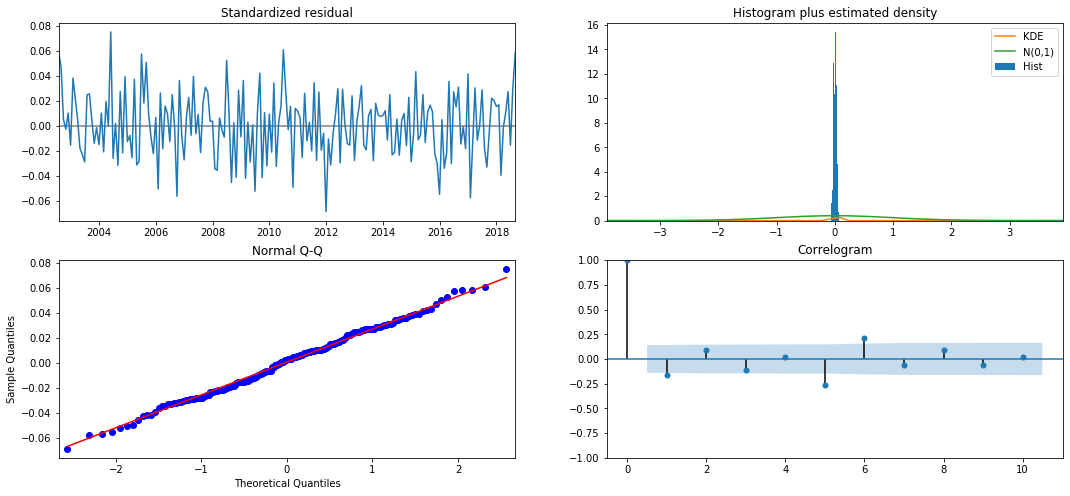

In [0]:
model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [0]:
PJME_month.head(15)

,PJME_MW,PJME_MW_BOX,PJME_MW_BOX_DIFF,sarima_model,fix_values
Date,,,,,
2002-01-31,31075.399731,0.846885,NaN,NaN,NaN
2002-02-28,30239.166667,0.846885,NaN,NaN,NaN
2002-03-31,28875.256720,0.846885,NaN,NaN,NaN
2002-04-30,28534.731572,0.846885,NaN,NaN,NaN
2002-05-31,28073.653226,0.846884,NaN,NaN,NaN
2002-06-30,33585.919444,0.846885,NaN,NaN,NaN
2002-07-31,38041.896505,0.846886,8.922640e-07,1.000000,1.000001
2002-08-31,38014.021505,0.846886,1.026875e-06,1.000000,1.000001
2002-09-30,31281.468056,0.846885,4.130445e-07,1.000000,1.000000


In [0]:
def invboxcox(y, lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))

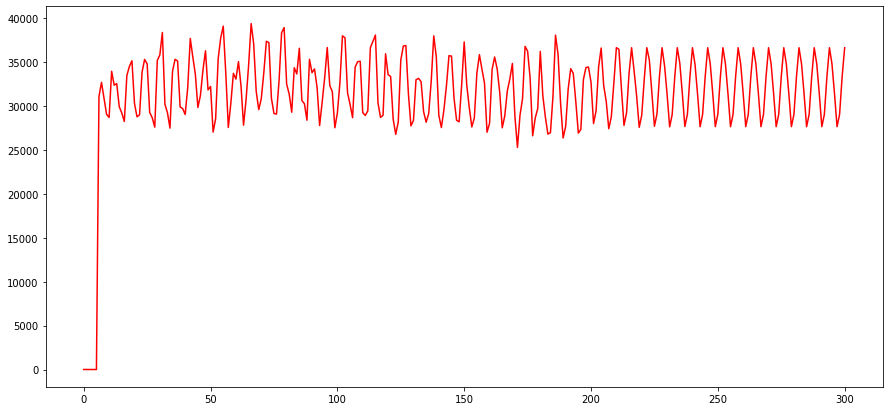

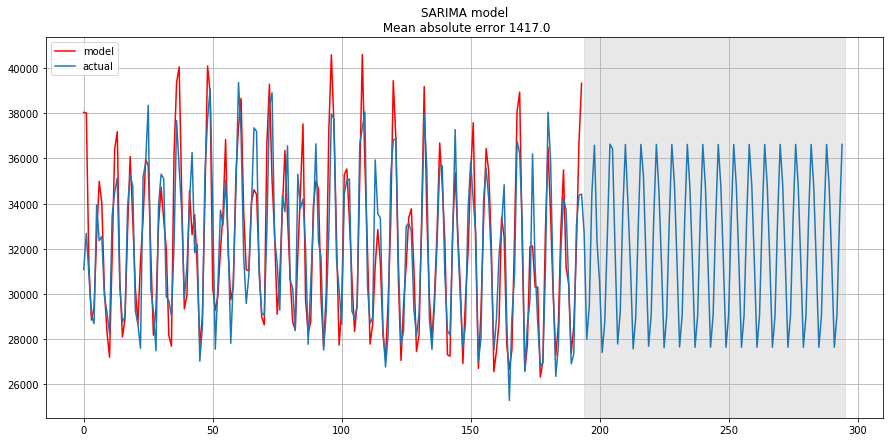

In [0]:
PJME_month['sarima_model'] = invboxcox(model.fittedvalues, lmbda)
forecast = invboxcox(model.predict(start = PJME_month.shape[0], end = PJME_month.shape[0] + 100), lmbda)
forecast = PJME_month.sarima_model.append(forecast).values[-500:]
actual = PJME_month.PJME_MW.values[-400:]
from sklearn.metrics import mean_absolute_error, mean_squared_error
plt.figure(figsize=(15, 7))
plt.plot(forecast, color='r', label="model")
plt.figure(figsize=(15, 7))
plt.plot(actual[6:], color='r', label="model")
plt.title("SARIMA model\n Mean absolute error {}".format(round(mean_absolute_error(PJME_month.PJME_MW[6:], PJME_month.sarima_model[6:]))))
plt.plot(forecast[6:], label="actual")
plt.legend()
plt.axvspan(len(actual) - 6, len(forecast) - 6, alpha=0.5, color='lightgrey')
plt.grid(True)

# pred = PJME_month.sarima_model.get_prediction(start=pd.to_datetime('2002-07-31'), dynamic=False)
# pred_ci = pred.conf_int()
# ax = PJME_month.fix_values.plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Retail_sold')
# plt.legend()
# plt.show()

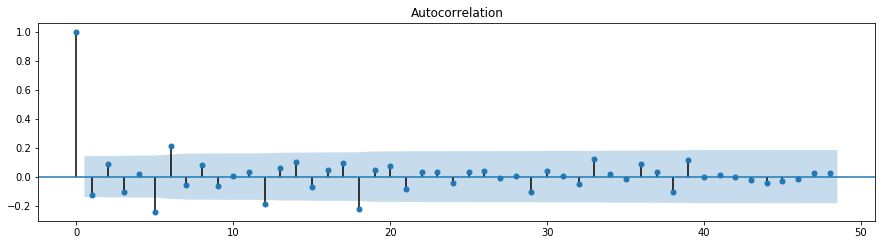

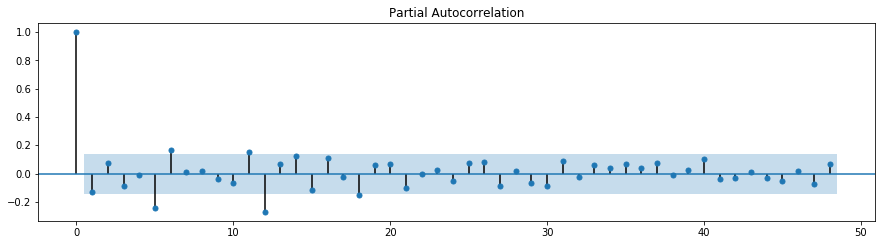

In [0]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(model.resid[6:].values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(model.resid[6:].values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()

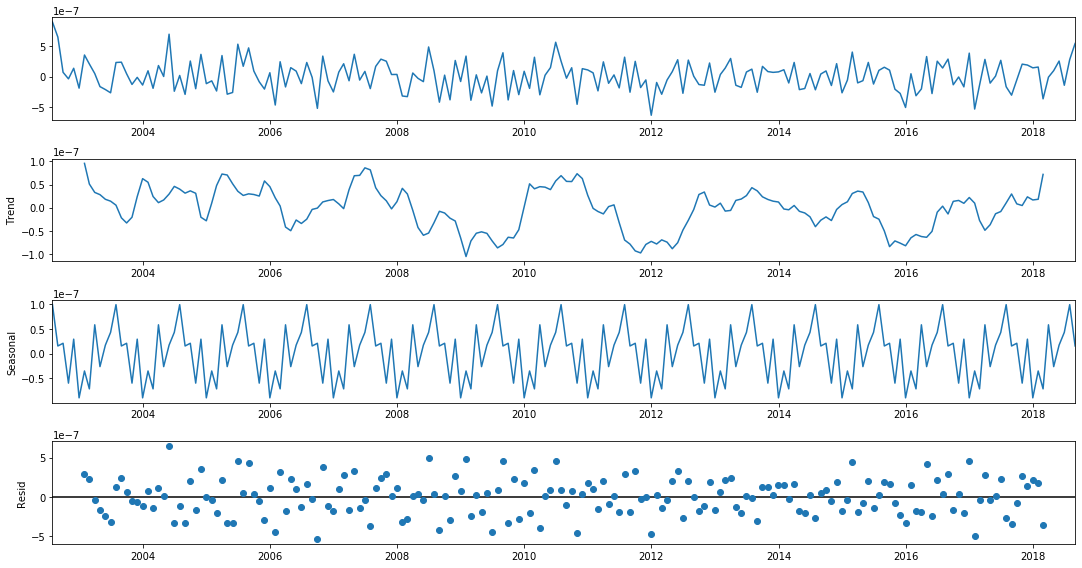

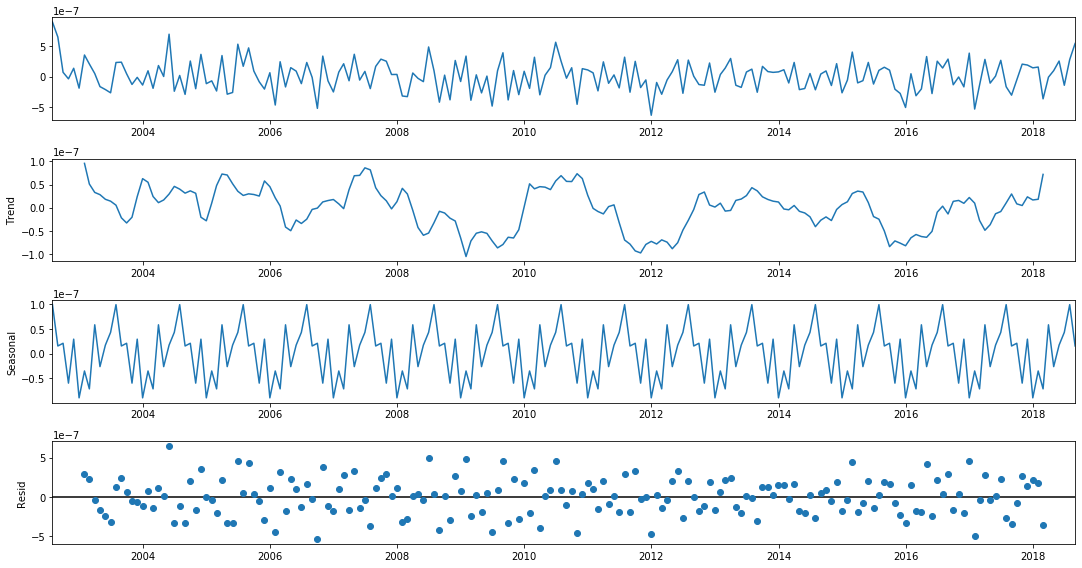

In [0]:
sm.tsa.seasonal_decompose(model.resid[6:]).plot()

In [0]:
PJME_month['month'] = [date.date().month for date in PJME_month.index]

In [0]:
PJME_month['quarter'] = [date.date().month // 3 + 1 for date in PJME_month.index]

In [0]:
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(PJME_month.PJME_MW_BOX, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 6),
                                        exog=PJME_month.iloc[:, 5:7]).fit()
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except Exception:
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  0%|                                                  | 0/480 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 12%|█████▏                                   | 60/480 [00:54<13:05,  1.87s/it]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 29%|███████████▋                            | 140/480 [01:46<10:08,  1.79s/it]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
100%|████████████████████████████████████████| 480/480 [06:51<00:00,  1

      parameters          aic
31  (1, 0, 2, 0) -4095.786950
2   (0, 1, 2, 0) -4095.144529
32  (1, 0, 2, 1) -4094.056139
33  (1, 1, 2, 0) -4094.053130
49  (2, 0, 2, 0) -4093.910840


In [0]:
# С использованием признаков
mod = sm.tsa.statespace.SARIMAX(PJME_month.PJME_MW_BOX, 
                                order = (1, 0, 0), seasonal_order=(2, 1, 0, 6),
                                exog=PJME_month.iloc[:, 5:7])

model = mod.fit()
model.aic

-4095.7869496967796

In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       PJME_MW_BOX   No. Observations:                  200
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 6)   Log Likelihood                2053.893
Date:                           Wed, 08 Apr 2020   AIC                          -4095.787
Time:                                   04:18:22   BIC                          -4076.180
Sample:                               01-31-2002   HQIC                         -4087.847
                                    - 08-31-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month       2.365e-08   1.58e-05      0.001      0.999   -3.09e-05     3.1e-05
quarter     7.882e-09   5.26e-06      0.001      0.999   -1.03e-05    1.03e-05
ar.L1          0.5053   3.73e-11   1.35e+10      0.000       0.505       0.505
ar.S.L6       -0.8301   1.09e-10   -7.6e+09      0.000      -0.830      -0.830
ar.S.L12      -0.2282   6.02e-11  -3.79e+09      0.000      -0.228      -0.228
sigma2          1e-10   1.42e-10      0.703      0.482   -1.79e-10    3.79e-10
===================================================================================
Ljung-Box (Q):                      119.37   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.00   Prob(JB):                         0.52
Heteroskedasticity (H):               1.07   Skew:                             0.17
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+27. Standard errors may be unstable.
"""

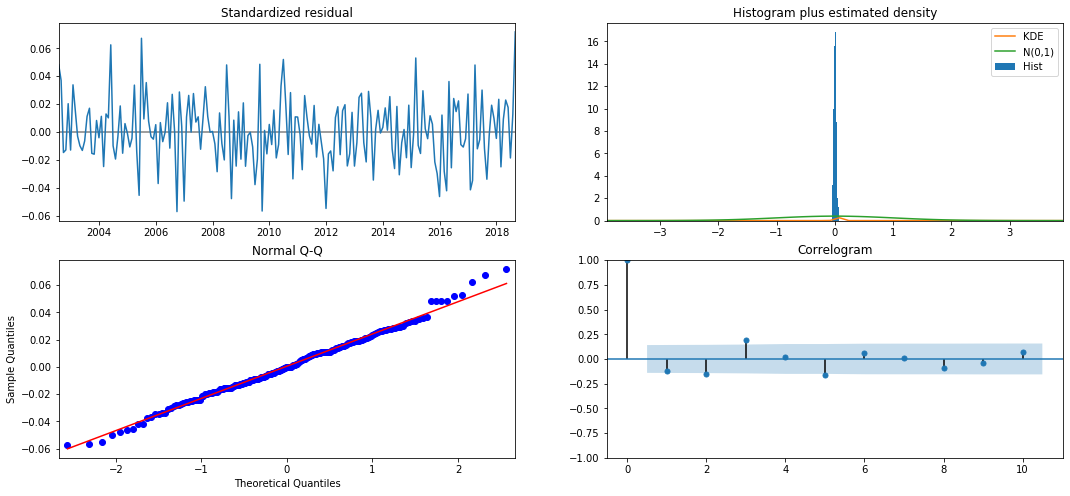

In [0]:
model.plot_diagnostics(figsize=(18, 8))
plt.show()

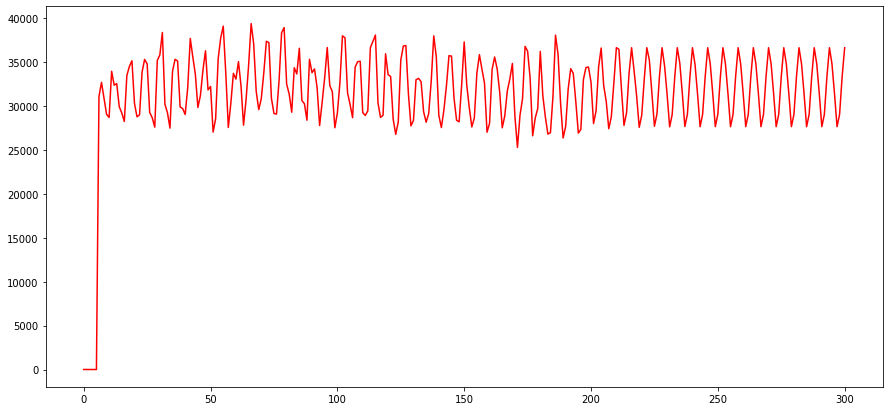

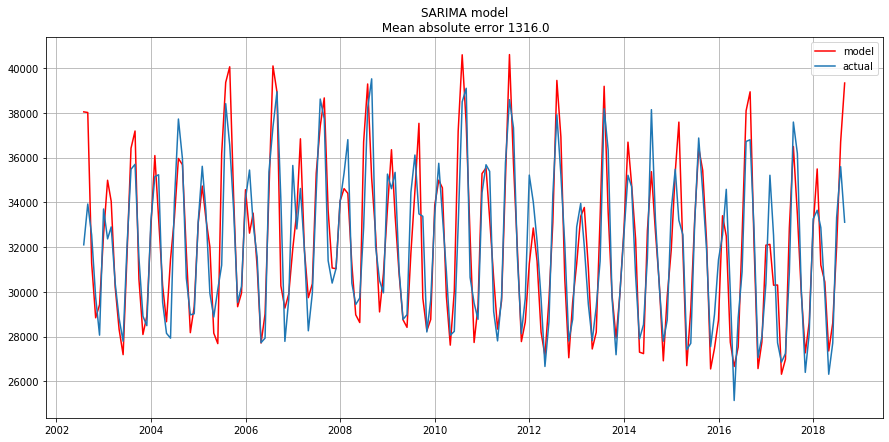

In [0]:
PJME_month['sarima_model_with_exog'] = invboxcox(model.fittedvalues, lmbda)
# forecast = invboxcox(model.predict(start = PJME_month.shape[0], end = PJME_month.shape[0] + 100, exog=PJME_month.iloc[:, 5:7]), lmbda)
# forecast = PJME_month.sarima_model_with_exog.append(forecast).values[-500:]
# actual = PJME_month.PJME_MW.values[-400:]
from sklearn.metrics import mean_absolute_error, mean_squared_error
plt.figure(figsize=(15, 7))
plt.plot(forecast, color='r', label="model")
plt.figure(figsize=(15, 7))
plt.plot(PJME_month.PJME_MW[6:], color='r', label="model")
plt.title("SARIMA model\n Mean absolute error {}".format(round(mean_absolute_error(PJME_month.PJME_MW[6:], PJME_month.sarima_model_with_exog[6:]))))
plt.plot(PJME_month.sarima_model_with_exog[6:], label="actual")
plt.legend()
# plt.axvspan(len(actual) - 6, len(forecast) - 6, alpha=0.5, color='lightgrey')
plt.grid(True)

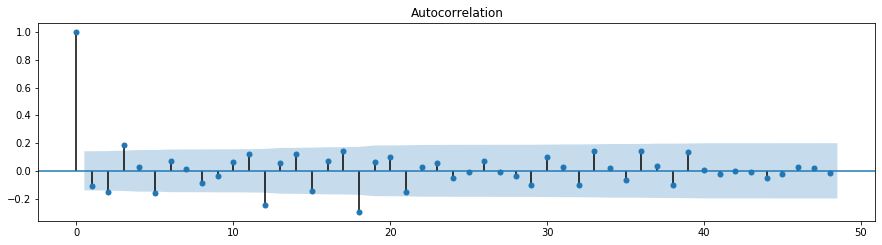

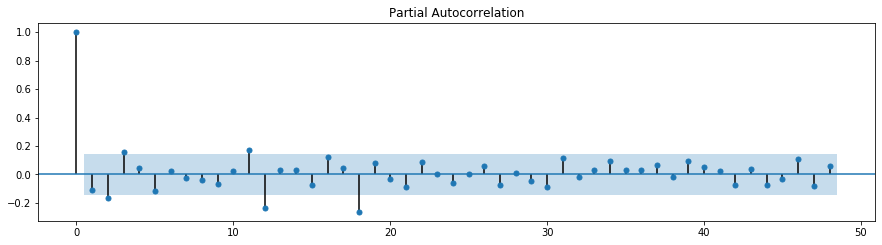

In [0]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(model.resid[6:].values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(model.resid[6:].values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()

In [0]:
PJME_day = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).resample('D').mean()

In [0]:
PJME_day

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-30,32957.416667,2018.0,7.0,30.0,3.0,211.0,31.0,0.0,11.5,0.0,0.0,0.0
2018-07-31,34539.083333,2018.0,7.0,31.0,3.0,212.0,31.0,1.0,11.5,0.0,0.0,0.0
2018-08-01,39230.791667,2018.0,8.0,1.0,3.0,213.0,31.0,2.0,11.5,0.0,0.0,0.0


In [0]:
del PJME_day['hour']

Оптимальный параметр преобразования Кокса- Бокса: -0.929646
 Критерий Дики-Фуллера: p=0.000000


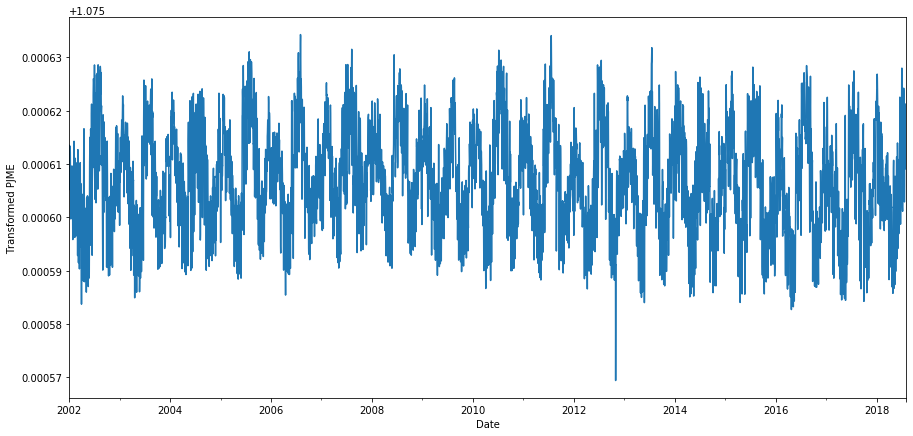

In [0]:
PJME_day['PJME_MW_BOX'], lmbda = stats.boxcox(PJME_day.PJME_MW)
plt.figure(figsize(15,7))
PJME_day.PJME_MW_BOX.plot()
plt.ylabel(u'Transformed PJME')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW_BOX)[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

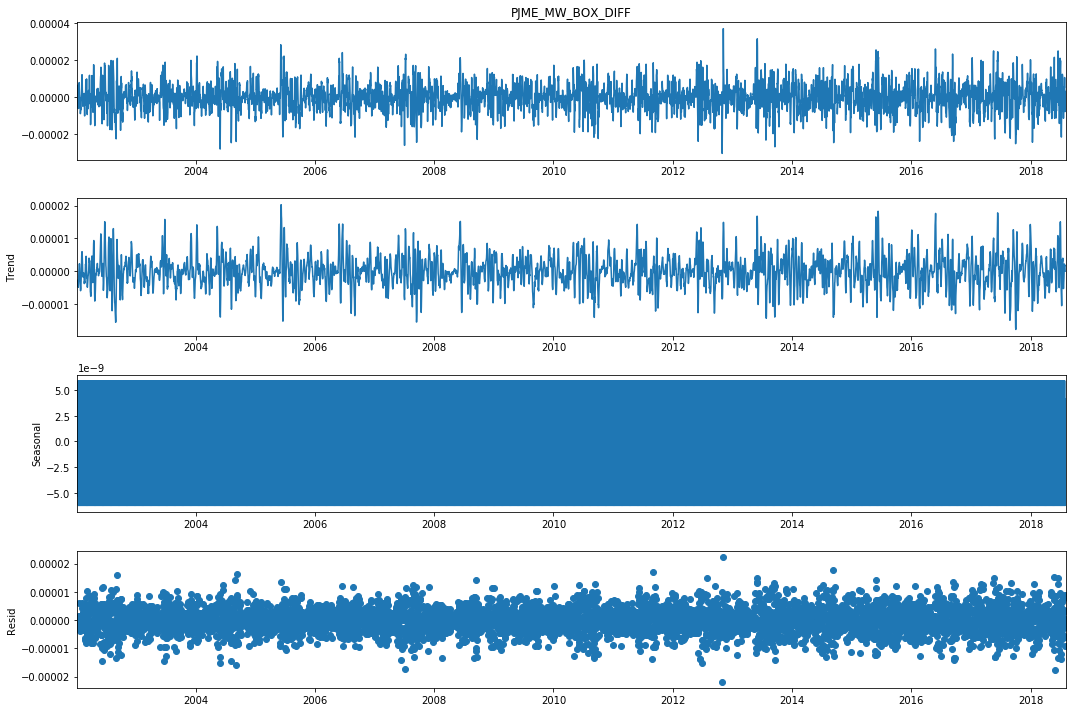

In [0]:
PJME_day['PJME_MW_BOX_DIFF'] = PJME_day.PJME_MW_BOX - PJME_day.PJME_MW_BOX.shift(7)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(PJME_day.PJME_MW_BOX_DIFF[7:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW_BOX_DIFF[7:])[1])

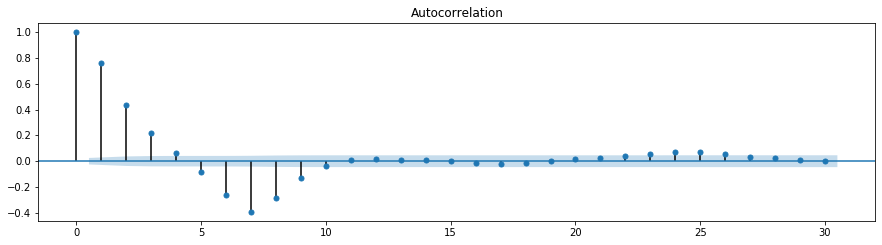

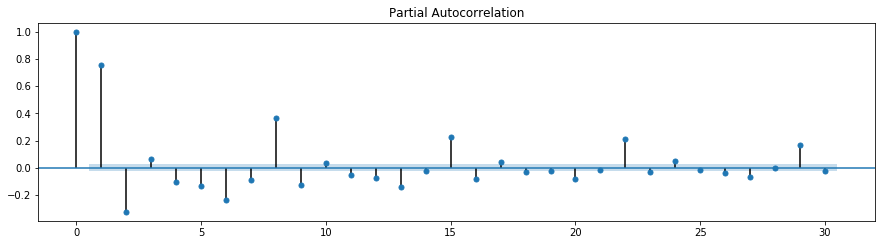

In [0]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_day.PJME_MW_BOX_DIFF.values[7:].squeeze(), lags=30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_day.PJME_MW_BOX_DIFF.values[7:].squeeze(), lags=30, ax=ax)
pylab.show()

In [0]:
ps = range(0, 7)
d = 0
qs = range(0, 10)
Ps = range(0, 2)
D = 1
Qs = range(0, 2)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

280

In [0]:
best_model_day = get_best_model(PJME_day.PJME_MW_BOX, parameters_list, d, D, 7, PJME_day.iloc[:, 1:11])

  0%|                                                  | 0/280 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
  1%|▌                                     | 4/280 [03:29<11:12:48, 146.26s/it]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 31%|████████████▉                            | 88/280 [12:59<08:25,  2.63s/it]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
100%|████████████████████████████████████████| 280/280 [38:44<00:00,  8

      parameters            aic
21  (2, 9, 1, 0) -127406.135954
23  (3, 9, 1, 0) -127403.370278
28  (4, 8, 1, 0) -127402.535349
29  (4, 9, 1, 0) -127401.361644
36  (5, 8, 1, 0) -127400.104544


In [0]:
best_model_day.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        PJME_MW_BOX   No. Observations:                 6059
Model:             SARIMAX(2, 0, 9)x(1, 1, [], 7)   Log Likelihood               63726.068
Date:                            Wed, 08 Apr 2020   AIC                        -127406.136
Time:                                    05:41:13   BIC                        -127251.849
Sample:                                01-01-2002   HQIC                       -127352.580
                                     - 08-03-2018                                         
Covariance Type:                              opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
year              5.05e-07   3.56e-05      0.014      0.989   -6.92e-05    7.03e-05
month            1.182e-05   6.04e-05      0.196      0.845      -0.000       0.000
dayofmonth       3.814e-07   1.97e-06      0.193      0.847   -3.49e-06    4.25e-06
quarter         -1.357e-06   3.72e-06     -0.365      0.715   -8.65e-06    5.93e-06
dayofyear       -3.821e-07   1.98e-06     -0.193      0.847   -4.26e-06     3.5e-06
weekofyear       -2.96e-08   9.02e-08     -0.328      0.743   -2.06e-07    1.47e-07
dayofweek        1.162e-20        nan        nan        nan         nan         nan
is_holiday      -3.672e-06   2.29e-06     -1.605      0.108   -8.16e-06    8.12e-07
is_prev_holiday -5.372e-07   1.77e-06     -0.304      0.761      -4e-06    2.93e-06
is_next_holiday  2.187e-08   1.81e-06      0.012      0.990   -3.53e-06    3.58e-06
ar.L1               0.9949   2.89e-09   3.44e+08      0.000       0.995       0.995
ar.L2              -0.3331   3.47e-09  -9.59e+07      0.000      -0.333      -0.333
ma.L1               0.1071   4.68e-10   2.29e+08      0.000       0.107       0.107
ma.L2              -0.0069    2.3e-09  -3.01e+06      0.000      -0.007      -0.007
ma.L3               0.1110   1.17e-09   9.52e+07      0.000       0.111       0.111
ma.L4               0.1002    1.9e-09   5.29e+07      0.000       0.100       0.100
ma.L5               0.0927   9.97e-10    9.3e+07      0.000       0.093       0.093
ma.L6               0.0839   1.81e-09   4.63e+07      0.000       0.084       0.084
ma.L7              -0.6637   1.48e-09  -4.49e+08      0.000      -0.664      -0.664
ma.L8              -0.0117   6.64e-10  -1.76e+07      0.000      -0.012      -0.012
ma.L9               0.0697   8.47e-10   8.23e+07      0.000       0.070       0.070
ar.S.L7            -0.3935    3.9e-10  -1.01e+09      0.000      -0.394      -0.394
sigma2               1e-10   2.57e-11      3.893      0.000    4.97e-11     1.5e-10
===================================================================================
Ljung-Box (Q):                      694.25   Jarque-Bera (JB):               314.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+26. Standard errors may be unstable.
"""

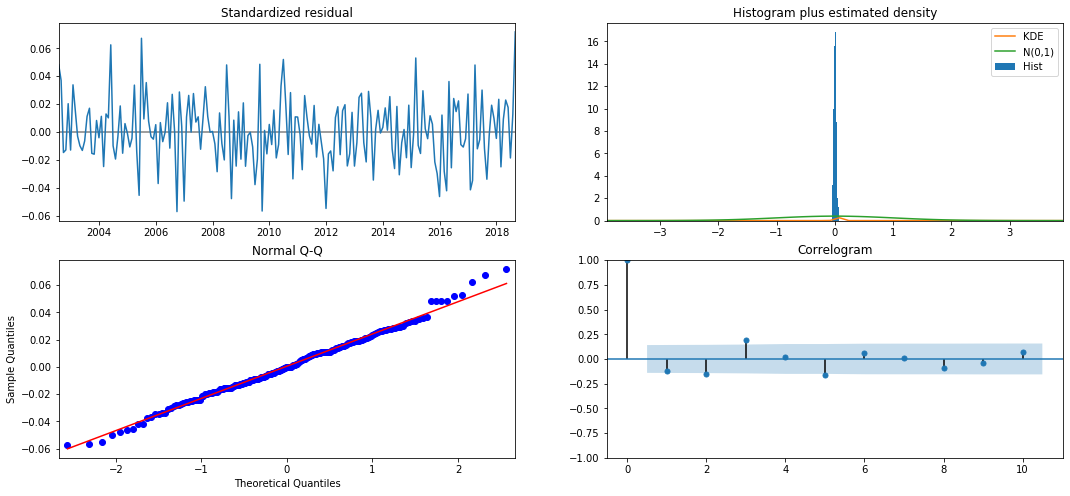

In [0]:
model.plot_diagnostics(figsize=(18, 8))
plt.show()

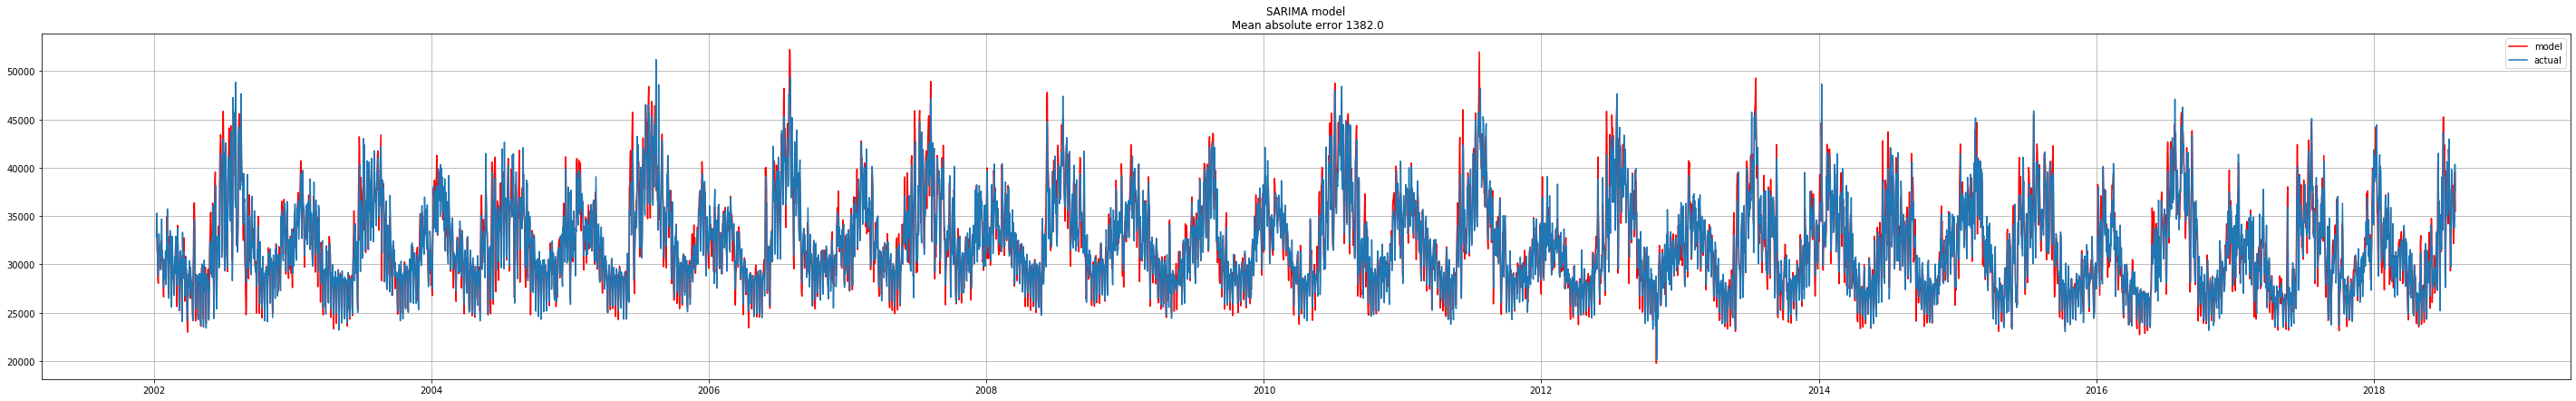

In [0]:
PJME_day['sarima_model_with_exog'] = invboxcox(best_model_day.fittedvalues, lmbda)
# forecast = invboxcox(model.predict(start = PJME_month.shape[0], end = PJME_month.shape[0] + 100, exog=PJME_month.iloc[:, 5:7]), lmbda)
# forecast = PJME_month.sarima_model_with_exog.append(forecast).values[-500:]
# actual = PJME_month.PJME_MW.values[-400:]
from sklearn.metrics import mean_absolute_error, mean_squared_error
plt.figure(figsize=(50, 7))
plt.plot(PJME_day.PJME_MW[7:], color='r', label="model")
plt.title("SARIMA model\n Mean absolute error {}".format(round(mean_absolute_error(PJME_day.PJME_MW[7:], PJME_day.sarima_model_with_exog[7:]))))
plt.plot(PJME_day.sarima_model_with_exog[7:], label="actual")
plt.legend()
# plt.axvspan(len(actual) - 6, len(forecast) - 6, alpha=0.5, color='lightgrey')
plt.grid(True)